まずは強磁性的な秩序からやるべきだと思う
これに反強磁性的な秩序とか、あるいは異方的な相互作用を入れようと思ったら具体的にどういう風にやるんだろうか


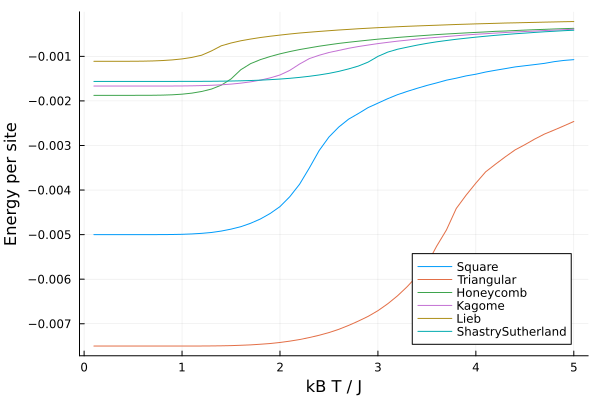

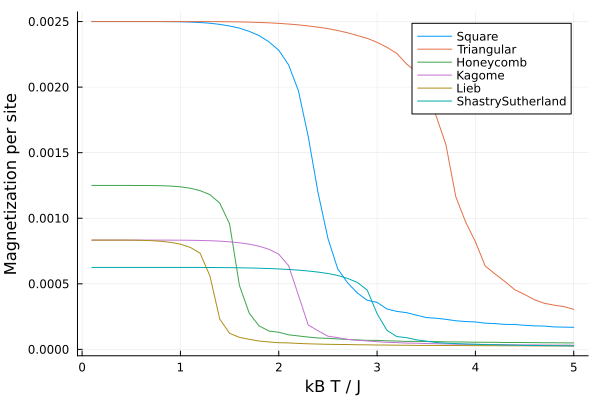

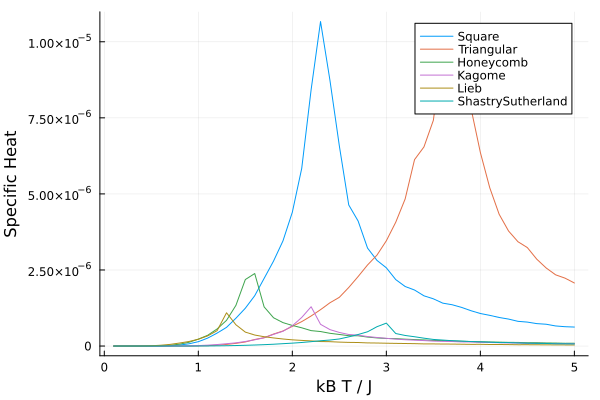

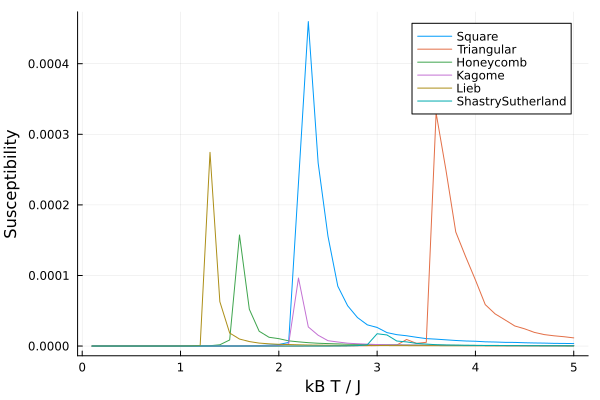

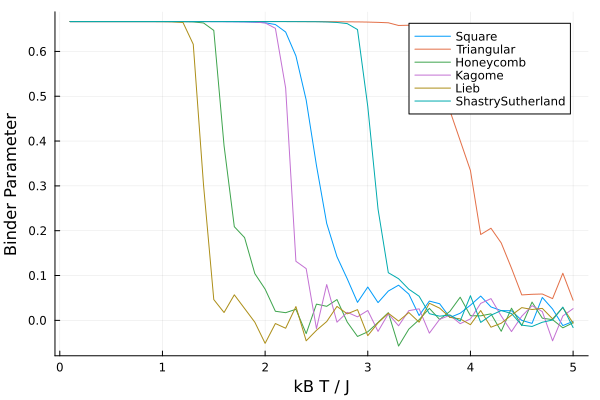

In [1]:
include("ising.jl")
AVAILABLE_LATTICES = [Square, Triangular, Honeycomb, Kagome, Lieb, ShastrySutherland]

p_eng = plot(xlabel="kB T / J", ylabel="Energy per site")
p_mag = plot(xlabel="kB T / J", ylabel="Magnetization per site")
p_spacific_heat = plot(xlabel="kB T / J", ylabel="Specific Heat")
p_susceptibility = plot(xlabel="kB T / J", ylabel="Susceptibility")
p_binder = plot(xlabel="kB T / J", ylabel="Binder Parameter")
for Lattice in AVAILABLE_LATTICES
    Lx, Ly = 20, 20
    lat = build_lattice(Lattice, Lx, Ly)

    grids = rand([-1, 1], lat.N)
    kbT_list = collect(0.1:0.1:5.0)
    reverse!(kbT_list)

    eng = zeros(length(kbT_list))
    mag = zeros(length(kbT_list))
    spacific_heat = zeros(length(kbT_list))
    susceptibility = zeros(length(kbT_list))
    binder = zeros(length(kbT_list))

    for (i, kbT) in enumerate(kbT_list)
        grids, energies, magnetizations = Metropolis(grids, lat, kbT; n_thermal=2000, n_steps=6000)
        # NOTE : measurements after thermalization
        eng[i] = mean(energies) / lat.N
        mag[i] = mean(abs.(magnetizations)) / lat.N
        spacific_heat[i] = (var(energies) / (kbT^2)) / lat.N
        susceptibility[i] = (var(magnetizations) / kbT) / lat.N
        binder[i] = 1.0 - (mean(magnetizations .^ 4) / (3 * mean(magnetizations .^ 2)^2))
    end
    plot!(p_eng, kbT_list, eng; label=string(Lattice))
    plot!(p_mag, kbT_list, mag; label=string(Lattice))
    plot!(p_spacific_heat, kbT_list, spacific_heat; label=string(Lattice))
    plot!(p_susceptibility, kbT_list, susceptibility; label=string(Lattice))
    plot!(p_binder, kbT_list, binder; label=string(Lattice))
end
display(p_eng)
display(p_mag)
display(p_spacific_heat)
display(p_susceptibility)
display(p_binder)


In [ ]:
include("ising.jl")
AVAILABLE_LATTICES = [Square, Triangular, Honeycomb, Kagome, Lieb, ShastrySutherland]

p_eng = plot(xlabel="kB T / J", ylabel="Energy per site")
p_mag = plot(xlabel="kB T / J", ylabel="Magnetization per site")
p_spacific_heat = plot(xlabel="kB T / J", ylabel="Specific Heat")
p_susceptibility = plot(xlabel="kB T / J", ylabel="Susceptibility")
p_binder = plot(xlabel="kB T / J", ylabel="Binder Parameter")
for Lattice in AVAILABLE_LATTICES
    Lx, Ly = 20, 20
    lat = build_lattice(Lattice, Lx, Ly)

    grids = rand([-1, 1], lat.N)
    kbT_list = collect(0.1:0.1:5.0)
    reverse!(kbT_list)

    eng = zeros(length(kbT_list))
    mag = zeros(length(kbT_list))
    spacific_heat = zeros(length(kbT_list))
    susceptibility = zeros(length(kbT_list))
    binder = zeros(length(kbT_list))

    for (i, kbT) in enumerate(kbT_list)
        grids, energies, magnetizations = Metropolis(grids, lat, kbT; n_thermal=2000, n_steps=6000)
        # NOTE : measurements after thermalization
        eng[i] = mean(energies) / lat.N
        mag[i] = mean(abs.(magnetizations)) / lat.N
        spacific_heat[i] = (var(energies) / (kbT^2)) / lat.N
        susceptibility[i] = (var(magnetizations) / kbT) / lat.N
        binder[i] = 1.0 - (mean(magnetizations .^ 4) / (3 * mean(magnetizations .^ 2)^2))
    end
    plot!(p_eng, kbT_list, eng; label=string(Lattice))
    plot!(p_mag, kbT_list, mag; label=string(Lattice))
    plot!(p_spacific_heat, kbT_list, spacific_heat; label=string(Lattice))
    plot!(p_susceptibility, kbT_list, susceptibility; label=string(Lattice))
    plot!(p_binder, kbT_list, binder; label=string(Lattice))
end
display(p_eng)
display(p_mag)
display(p_spacific_heat)
display(p_susceptibility)
display(p_binder)
